# Depression detection with Deep Learning

## importing libraries

In [1]:
#importing dataset
import pandas as pd
import numpy as np

#normalizing text
import nltk
from nltk.corpus import stopwords

#importing deep learning libraries
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.optimizers import SGD
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

## importing dataset

In [2]:
df = pd.read_csv(r'C:\Users\Leonardo Luchetti\Documents\Fordham\Classes\Text Analytics\Training-Validation.csv')

## creating dv

In [3]:
#%% creating df with body and dv
df1 = df.copy()

#dv = 1 for containing depressive tendencies
df1['dv'] = None

for i in range(0,len(df1)):
    if df1['subreddit'][i] == 'depression':
        df1['dv'][i] = 1
    elif df1['subreddit'][i] == 'depression_help':
        df1['dv'][i] = 1
    elif df1['subreddit'][i] == 'AmItheAsshole':
        df1['dv'][i] = 0
    elif df1['subreddit'][i] == 'mentalhealth':
        df1['dv'][i] = 1
    elif df1['subreddit'][i] == 'relationship_advice':
        df1['dv'][i] = 0
    else:
        print(df1['subreddit'][i])
        
#deleting useless info
df2 = df.copy()

df2 = df1[['body','dv']]

df2

<ipython-input-3-7efdb4594aac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dv'][i] = 1
<ipython-input-3-7efdb4594aac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dv'][i] = 1
<ipython-input-3-7efdb4594aac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dv'][i] = 0
<ipython-input-3-7efdb4594aac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,body,dv
0,We understand that most people who reply immed...,1
1,Welcome to /r/depression's check-in post - a p...,1
2,"Hello everyone, little short intro here. I am...",1
3,\nI’m 17. Today is my Dads 70th birthday. Tha...,1
4,"I dont know if that makes sense, but thats how...",1
...,...,...
4442,"From the time I was 15 and my brother was 18, ...",0
4443,Many of my friends text very differently than...,0
4444,I (24M) have been talking to a woman (24) for ...,0
4445,I've been seeing this woman for several weeks ...,0


## normalizing text

In [4]:
#downloading stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#removing pronouns from list
stop_words = stop_words[35:]

In [5]:
def normalization(text):
    #tokenizing words
    words = nltk.word_tokenize(str(text))

    #removing capital letters
    words = [i.lower() for i in words]

    #removing non-letter tokens
    words = [i for i in words if i.isalpha()]

    #retreiving words that are not stopwords
    nonstopwords_words = [i for i in words if i not in stop_words]
    
    #Use Porter Stemmer 
    porter = nltk.PorterStemmer()
    stem1 = [porter.stem(w) for w in nonstopwords_words]
    
    text_string = ' '
    text_string = text_string.join(stem1)
    
    return(text_string)

for i in range(0,len(df2)):
    df2['body'][i] = normalization(df2['body'][i])
    
df2

C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,body,dv
0,we understand peopl repli immedi op invit talk...,1
1,welcom post place take moment share go you you...,1
2,hello everyon littl short intro i myanmar myan...,1
3,i today my dad birthday might surpris peopl pr...,1
4,i dont know make sens that i feel,1
...,...,...
4442,time i my brother he use drug mayb even first ...,0
4443,mani my friend text differ myself i get excit ...,0
4444,i talk woman month past coupl week she distant...,0
4445,i see woman sever week it go great littl good ...,0


## vectorizing

In [6]:
#word-level one-hot encoding

text = [str(i) for i in df2['body']]

#Using Keras for word-level one-hot encoding

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)

#one-hot final vector
one_hot_results = tokenizer.texts_to_matrix(text, mode='binary')

#recovering the word index that was computated
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 11727 unique tokens.


## creating train, test, and validation sets

In [144]:
#%% separating training, test data (80%), and valuation

#valuation
x_val = one_hot_results[3534:]
y_val = np.asarray(df2['dv'][3534:]).astype('float32')

x_train_test = one_hot_results[:3534]
y_train_test = df2[:3534]

percent_value = round(0.8*len(x_train_test))

x_train = x_train_test[:percent_value]
x_test = x_train_test[percent_value:]

#%%

y_train = np.asarray(df2['dv'][:percent_value]).astype('float32')
y_test = np.asarray(df2['dv'][percent_value:len(y_train_test)]).astype('float32')

## building baseline model

In [252]:
#%% building model
model = models.Sequential()

model.add(layers.Dense(512, activation='sigmoid', input_shape=(25,)))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [253]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=250,
                    validation_data=(x_val, y_val))

Epoch 1/100
12/12 [==============================] - 0s 23ms/step - loss: 0.5603 - accuracy: 0.7365 - val_loss: 1.4906 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.7810 - val_loss: 1.1703 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7810 - val_loss: 1.2648 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.7814 - val_loss: 1.1356 - val_accuracy: 0.0164
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.7846 - val_loss: 0.8900 - val_accuracy: 0.2979
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8008 - val_loss: 0.9057 - val_accuracy: 0.3450
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8214 - val_loss: 0.9411 - val_accuracy: 0.3505


In [254]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

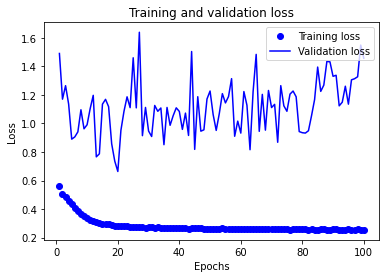

In [255]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

#'bo' is for blue dot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#b is for "solid blue line"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

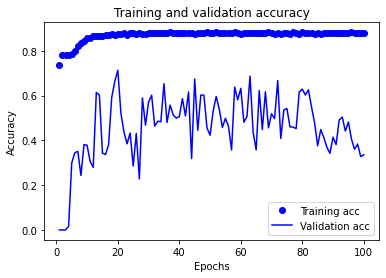

In [256]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [257]:
sum(history_dict['val_accuracy'])/len(history_dict['val_accuracy'])

0.4606900348141789

## Creating Function for Iteration

In [11]:
import numpy
np.random.seed(3)

In [12]:
def run_model(n_tokens,eps,bs,optm,loss_f,dlm):
    #%% vectorizing word-level one-hot encoding

    text = [str(i) for i in df2['body']]

    #Using Keras for word-level one-hot encoding

    tokenizer = Tokenizer(num_words=n_tokens)

    tokenizer.fit_on_texts(text)

    sequences = tokenizer.texts_to_sequences(text)

    #one-hot final vector
    one_hot_results = tokenizer.texts_to_matrix(text, mode='binary')

    #recovering the word index that was computated
    word_index = tokenizer.word_index

    ######################################################

    #%% separating training, test data (80%), and valuation
    import numpy as np

    percent_value = round(0.8*len(one_hot_results))

    #validation
    x_val = one_hot_results[percent_value:]
    y_val = np.asarray(df2['dv'][percent_value:]).astype('float32')

    #train/test
    x_train_test = one_hot_results[:percent_value]
    y_train_test = df2[:percent_value]

    percent_value_2 = round(0.8*len(x_train_test))

    x_train = x_train_test[:percent_value_2]
    x_test = x_train_test[percent_value_2:]

    #%%

    y_train = np.asarray(df2['dv'][:percent_value_2]).astype('float32')
    y_test = np.asarray(df2['dv'][percent_value_2:len(y_train_test)]).astype('float32')

    ######################################################
    
    model = 0
    model = dlm

    ######################################################
    
    model.compile(optimizer=optm,
                  loss=loss_f,
                  metrics=['accuracy'])
    
    print('Running Model')

    history = model.fit(x_train,
                        y_train,
                        epochs=eps,
                        batch_size=bs,
                        validation_data=(x_val, y_val),
                        verbose=0)

    ######################################################

    history_dict = history.history

    val_acc_values = history_dict['val_accuracy']
    val_loss_values = history_dict['val_loss']
    
    #######################################################
    return{'tokens':n_tokens,
           'epochs':eps,
           'batch size':bs,
           'optimizer':optm,
           'loss_function':loss_f,
           'val_acc_mean':sum(val_acc_values)/len(val_acc_values),
           'val_acc_max':max(val_acc_values),
           'val_acc_min':min(val_acc_values),
           'val_loss_mean':sum(val_loss_values)/len(val_loss_values),
           'val_loss_max':max(val_loss_values),
           'val_loss_min':min(val_loss_values),
           'model':dlm}

optimizers = [
    'SGD',
    'Adam',
    'Adadelta',
    #'Adagrad',
]

loss_funcs = [
    'binary_crossentropy',
    #'hinge',
    'squared_hinge'
]

## Iterating initial model

In [17]:
model_performance_df = pd.DataFrame()

x = 1

for n_tokens in [10,25,50,100,500]:
    for eps in [10,50]:
        for bs in [4,20,40]:
            for optm in optimizers:
                for loss_f in loss_funcs:
                    dlm = models.Sequential()
                    dlm.add(layers.Dense(512, activation='sigmoid', input_shape=(n_tokens,)))
                    dlm.add(layers.Dense(16, activation='sigmoid'))
                    dlm.add(layers.Dense(1, activation='sigmoid'))
                    print(n_tokens,eps,bs,optm,loss_f)
                    model = run_model(n_tokens,eps,bs,optm,loss_f)
                    model_information_df = pd.DataFrame.from_dict([model])
                    model_performance_df = model_performance_df.append(model,ignore_index=True)
                    print(str(x)+' out of '+str(5*2*3*len(optimizers)*len(loss_funcs))+' models successfully ran.')
                    x+=1

model_performance_df

10 10 4 SGD binary_crossentropy
Running Model
1 out of 180 models successfully ran.
10 10 4 SGD squared_hinge
Running Model
2 out of 180 models successfully ran.
10 10 4 Adam binary_crossentropy
Running Model
3 out of 180 models successfully ran.
10 10 4 Adam squared_hinge
Running Model
4 out of 180 models successfully ran.
10 10 4 Adadelta binary_crossentropy
Running Model
5 out of 180 models successfully ran.
10 10 4 Adadelta squared_hinge
Running Model
6 out of 180 models successfully ran.
10 10 20 SGD binary_crossentropy
Running Model
7 out of 180 models successfully ran.
10 10 20 SGD squared_hinge
Running Model
8 out of 180 models successfully ran.
10 10 20 Adam binary_crossentropy
Running Model
9 out of 180 models successfully ran.
10 10 20 Adam squared_hinge
Running Model
10 out of 180 models successfully ran.
10 10 20 Adadelta binary_crossentropy
Running Model
11 out of 180 models successfully ran.
10 10 20 Adadelta squared_hinge
Running Model
12 out of 180 models successfully 

,batch size,epochs,loss_function,model,optimizer,tokens,val_acc_max,val_acc_mean,val_acc_min,val_loss_max,val_loss_mean,val_loss_min
0,4.0,10.0,binary_crossentropy,<tensorflow.python.keras.engine.sequential.Seq...,SGD,10.0,0.121485,0.024184,0.000000,1.632703,1.417813,1.217408
1,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,SGD,10.0,0.860517,0.265917,0.000000,2.573394,2.360230,2.067563
2,4.0,10.0,binary_crossentropy,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.586052,0.456580,0.276715,1.328930,1.055955,0.849414
3,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.888639,0.851519,0.759280,1.810256,1.485871,1.331914
4,4.0,10.0,binary_crossentropy,<tensorflow.python.keras.engine.sequential.Seq...,Adadelta,10.0,0.000000,0.000000,0.000000,1.425643,1.184373,0.761088
...,...,...,...,...,...,...,...,...,...,...,...,...
175,40.0,50.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,SGD,500.0,0.679415,0.412958,0.000000,2.492095,2.214389,1.965208
176,40.0,50.0,binary_crossentropy,<tensorflow.python.keras.engine.sequential.Seq...,Adam,500.0,0.429696,0.325332,0.237345,4.847804,3.741578,1.245549
177,40.0,50.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,500.0,0.659168,0.423442,0.373453,2.766216,2.615134,1.934020
178,40.0,50.0,binary_crossentropy,<tensorflow.python.keras.engine.sequential.Seq...,Adadelta,500.0,1.000000,0.473453,0.000000,1.128493,0.711228,0.280447


In [18]:
model_performance_df.to_csv('model_results.csv')

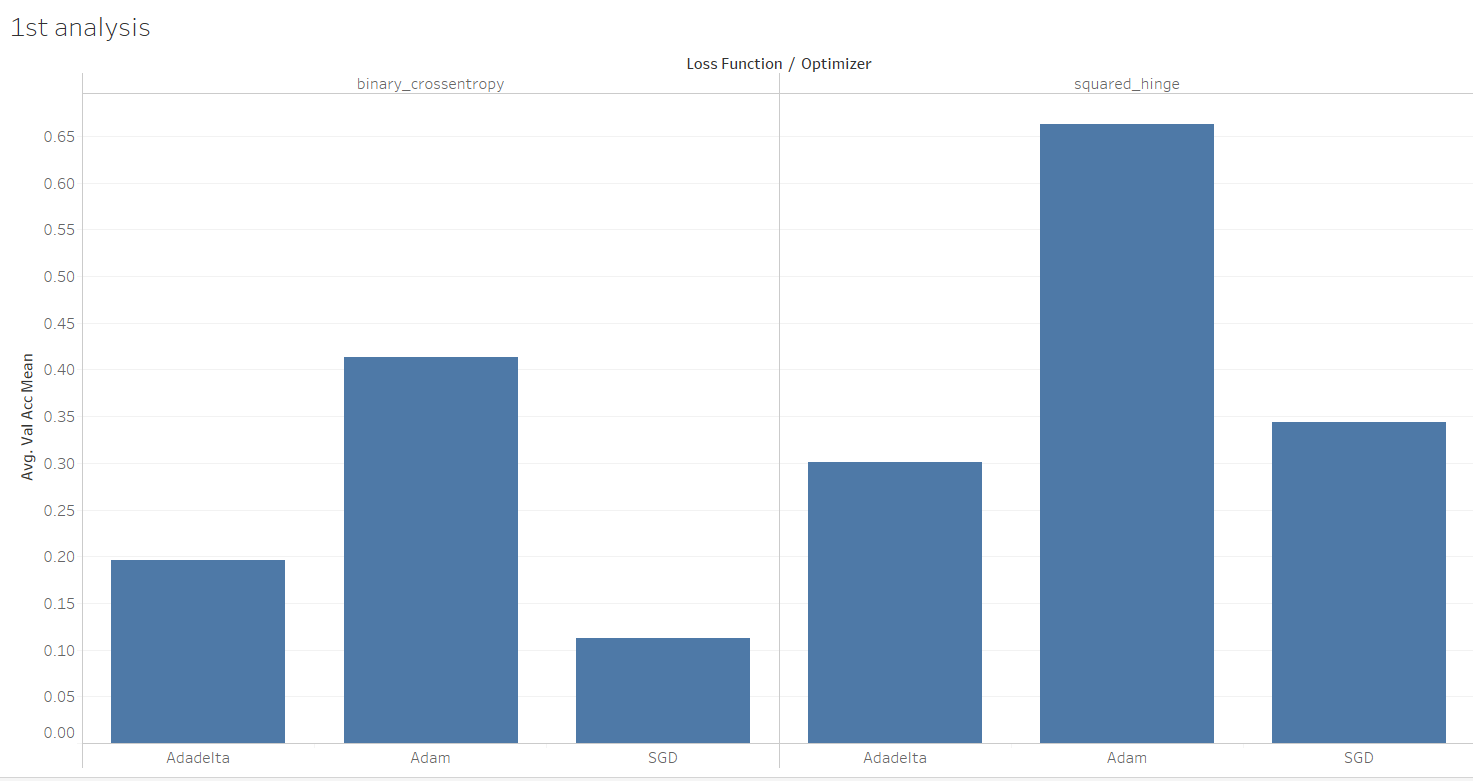
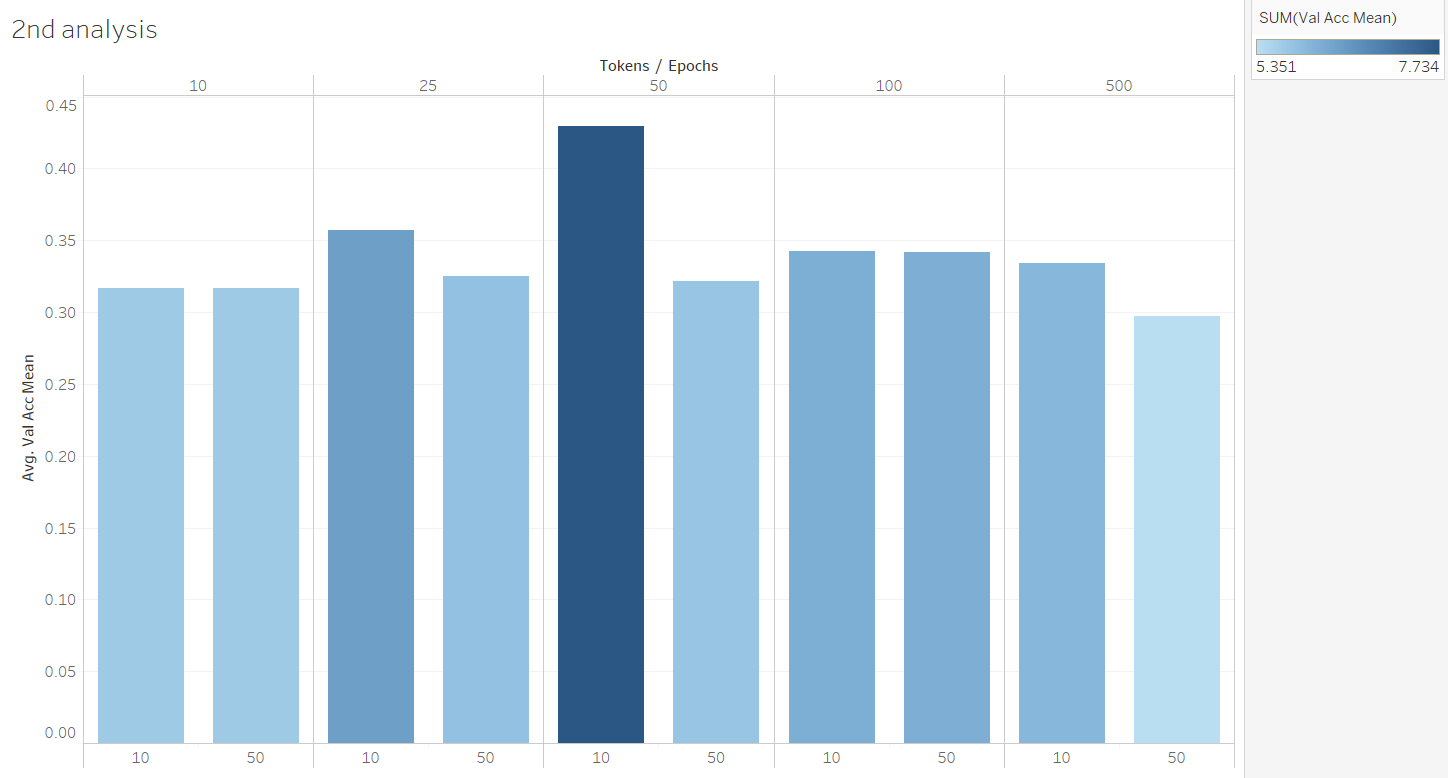

## Iterating Different Models with standard settings

In [22]:
model_performance_df = pd.DataFrame()

optimizers = [
    #'SGD',
    'Adam',
    #'Adadelta',
    #'Adagrad',
]

loss_funcs = [
    #'binary_crossentropy',
    #'hinge',
    'squared_hinge'
]

x = 1
tokens_list = [10,50]
epochs_list = [10]
batch_list = [4]
model_list = ['model_LSTM_Dense','model_LSTM_Dropout','model_RNN','model_Dense_sigmoid','model_Dense_relu','model_Dense_relu_sigmoid']

for n_tokens in tokens_list:
    for eps in epochs_list:
        for bs in batch_list:
            for optm in optimizers:
                for loss_f in loss_funcs:
                    for model_dl in model_list:
                        if model_dl == 'model_LSTM_Dense':
                            model_LSTM_Dense = Sequential()
                            model_LSTM_Dense.add(layers.Embedding(input_dim=n_tokens, output_dim=32))
                            model_LSTM_Dense.add(layers.LSTM(32))
                            model_LSTM_Dense.add(layers.Dense(8))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_LSTM_Dense)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_LSTM_Dropout':
                            model_LSTM_Dropout = Sequential()
                            model_LSTM_Dropout.add(Embedding(n_tokens,32))
                            model_LSTM_Dropout.add(LSTM(32,dropout=0.2,recurrent_dropout=0.2))
                            model_LSTM_Dropout.add(Dense(1,activation='sigmoid'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_LSTM_Dropout)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_RNN':
                            model_RNN = Sequential()
                            model_RNN.add(Embedding(n_tokens, 32))
                            model_RNN.add(layers.SimpleRNN(16))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_RNN)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_Dense_sigmoid':
                            model_Dense_sigmoid = models.Sequential()
                            model_Dense_sigmoid.add(layers.Dense(1, activation='sigmoid', input_shape=(n_tokens,)))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_Dense_sigmoid)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_Dense_relu':
                            model_Dense_relu = models.Sequential()
                            model_Dense_relu.add(layers.Dense(16, activation='relu', input_shape=(n_tokens,)))
                            model_Dense_relu.add(layers.Dense(16, activation='relu'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_Dense_relu)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_Dense_relu_sigmoid':
                            model_Dense_relu_sigmoid = models.Sequential()
                            model_Dense_relu_sigmoid.add(layers.Dense(32, activation='sigmoid', input_shape=(n_tokens,)))
                            model_Dense_relu_sigmoid.add(layers.Dense(16, activation='sigmoid'))
                            model_Dense_relu_sigmoid.add(layers.Dense(1, activation='sigmoid'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_Dense_relu_sigmoid)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        else:print('error')
                        

model_performance_df

10 10 4 Adam squared_hinge model_LSTM_Dense
Running Model
1 out of 12 models successfully ran.
10 10 4 Adam squared_hinge model_LSTM_Dropout
Running Model
2 out of 12 models successfully ran.
10 10 4 Adam squared_hinge model_RNN
Running Model
3 out of 12 models successfully ran.
10 10 4 Adam squared_hinge model_Dense_sigmoid
Running Model
4 out of 12 models successfully ran.
10 10 4 Adam squared_hinge model_Dense_relu
Running Model
5 out of 12 models successfully ran.
10 10 4 Adam squared_hinge model_Dense_relu_sigmoid
Running Model
6 out of 12 models successfully ran.
50 10 4 Adam squared_hinge model_LSTM_Dense
Running Model
7 out of 12 models successfully ran.
50 10 4 Adam squared_hinge model_LSTM_Dropout
Running Model
8 out of 12 models successfully ran.
50 10 4 Adam squared_hinge model_RNN
Running Model
9 out of 12 models successfully ran.
50 10 4 Adam squared_hinge model_Dense_sigmoid
Running Model
10 out of 12 models successfully ran.
50 10 4 Adam squared_hinge model_Dense_relu
R

,batch size,epochs,loss_function,model,optimizer,tokens,val_acc_max,val_acc_mean,val_acc_min,val_loss_max,val_loss_mean,val_loss_min
0,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.159730,0.094488,0.032621,1.904282,1.554428,1.379405
1,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.817773,0.775816,0.752531,1.750879,1.676886,1.596544
2,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.122610,0.038808,0.000000,1.956630,1.635956,1.394746
3,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.672666,0.637795,0.580427,2.107624,1.906489,1.769425
4,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.481440,0.295388,0.120360,2.049243,1.661193,1.473416
5,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.877390,0.789989,0.523060,2.305693,1.733407,1.490239
6,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.237345,0.134646,0.005624,2.379588,1.911665,1.556935
7,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.848144,0.626997,0.438695,2.502131,2.081430,1.722979
8,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.110236,0.030821,0.000000,2.116413,1.883245,1.574822
9,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.786277,0.743420,0.719910,1.914979,1.802146,1.716386


In [26]:
model_performance_df.val_acc_max.max()

0.8773903250694275

In [23]:
model_performance_df.to_csv('model_results2.csv')

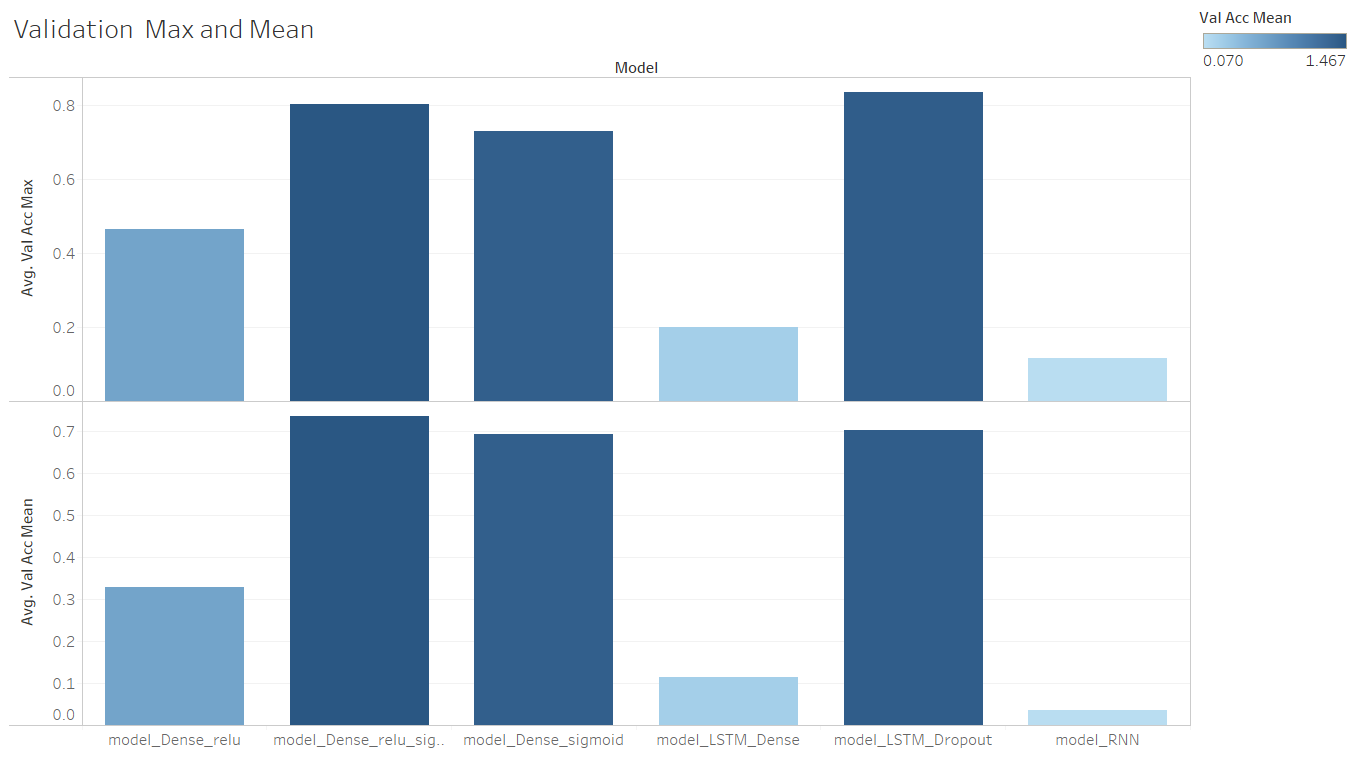

## Further optimizing models - adding layers to best models

In [13]:
model_performance_df = pd.DataFrame()

optimizers = [
    #'SGD',
    'Adam',
    #'Adadelta',
    #'Adagrad',
]

loss_funcs = [
    #'binary_crossentropy',
    #'hinge',
    'squared_hinge'
]

x = 1
tokens_list = [10,50]
epochs_list = [10]
batch_list = [4]
model_list = ['model_LSTM_Dropout','model_Dense_sigmoid','model_Dense_relu_sigmoid']

for n_tokens in tokens_list:
    for eps in epochs_list:
        for bs in batch_list:
            for optm in optimizers:
                for loss_f in loss_funcs:
                    for model_dl in model_list:
                        if model_dl == 'model_LSTM_Dropout':
                            model_LSTM_Dropout = Sequential()
                            model_LSTM_Dropout.add(Embedding(n_tokens,32))
                            model_LSTM_Dropout.add(LSTM(32,dropout=0.2,recurrent_dropout=0.2))
                            model_LSTM_Dropout.add(Dense(8,activation='sigmoid'))
                            model_LSTM_Dropout.add(Dense(1,activation='sigmoid'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_LSTM_Dropout)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_Dense_sigmoid':
                            model_Dense_sigmoid = models.Sequential()
                            model_Dense_sigmoid.add(layers.Dense(1, activation='sigmoid', input_shape=(n_tokens,)))
                            model_Dense_sigmoid.add(Dense(1,activation='sigmoid'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_Dense_sigmoid)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        elif model_dl == 'model_Dense_relu_sigmoid':
                            model_Dense_relu_sigmoid = models.Sequential()
                            model_Dense_relu_sigmoid.add(layers.Dense(32, activation='sigmoid', input_shape=(n_tokens,)))
                            model_Dense_relu_sigmoid.add(layers.Dense(16, activation='sigmoid'))
                            model_Dense_relu_sigmoid.add(layers.Dense(8, activation='sigmoid'))
                            model_Dense_relu_sigmoid.add(layers.Dense(8, activation='relu'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_Dense_relu_sigmoid)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        else:print('error')
                        

model_performance_df

10 10 4 Adam squared_hinge model_LSTM_Dropout
Running Model
1 out of 6 models successfully ran.
10 10 4 Adam squared_hinge model_Dense_sigmoid
Running Model
2 out of 6 models successfully ran.
10 10 4 Adam squared_hinge model_Dense_relu_sigmoid
Running Model
3 out of 6 models successfully ran.
50 10 4 Adam squared_hinge model_LSTM_Dropout
Running Model
4 out of 6 models successfully ran.
50 10 4 Adam squared_hinge model_Dense_sigmoid
Running Model
5 out of 6 models successfully ran.
50 10 4 Adam squared_hinge model_Dense_relu_sigmoid
Running Model
6 out of 6 models successfully ran.


,batch size,epochs,loss_function,model,optimizer,tokens,val_acc_max,val_acc_mean,val_acc_min,val_loss_max,val_loss_mean,val_loss_min
0,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.840270,0.793138,0.718785,1.844392,1.624599,1.448750
1,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.991001,0.862430,0.840270,2.091141,1.971649,1.853256
2,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.902137,0.645894,0.280090,1.686380,1.442957,1.307753
3,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.829021,0.587289,0.391451,2.586079,2.126977,1.571801
4,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.712036,0.617773,0.213723,2.418003,2.129005,1.966334
5,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,50.0,0.887514,0.631721,0.133858,1.410104,1.321840,1.172974


## Running Optimal Model on Correlation Data: Alcoholism, Addiction, Suicide

### importing data

In [18]:
df_valid = pd.read_csv(r'C:\Users\Leonardo Luchetti\Documents\Fordham\Classes\Text Analytics\correlation.csv')

df_valid.subreddit.unique()

array(['SuicideWatch', 'cripplingalcoholism', 'addiction'], dtype=object)

### adding dv & normalizing text

In [21]:
#%% creating df with body and dv
df_valid1 = df_valid.copy()

#dv = 1 for containing depressive tendencies
df_valid1['dv'] = None

for i in range(0,len(df_valid1)):
    if df_valid1['subreddit'][i] == 'SuicideWatch':
        df_valid1['dv'][i] = 1
    elif df_valid1['subreddit'][i] == 'cripplingalcoholism':
        df_valid1['dv'][i] = 1
    elif df_valid1['subreddit'][i] == 'addiction':
        df_valid1['dv'][i] = 1
    else:
        print(df_valid1['subreddit'][i])
        
#deleting useless info
df_valid2 = df_valid.copy()

df_valid2 = df_valid1[['body','dv']]

#normalizing text
for i in range(0,len(df_valid2)):
    df_valid2['body'][i] = normalization(df_valid2['body'][i])
    
df_valid2

<ipython-input-21-59ff12131636>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid1['dv'][i] = 1
<ipython-input-21-59ff12131636>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid1['dv'][i] = 1
<ipython-input-21-59ff12131636>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid1['dv'][i] = 1
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A valu

,body,dv
0,we see worri increas content show also go unre...,1
1,activ advoc fundrais social chang rais awar so...,1
2,i year old we go togeth forev i love him much ...,1
3,i sick it alway tire despit spend my day bed r...,1
4,either go homeless starv death work slave wage...,1
...,...,...
2642,i relaps todday fuck mannn shit annoy i dont w...,1
2643,i addict adderal sever year last fall end unex...,1
2644,speaker meet meet tonight thursday eastern tim...,1
2645,you need help want talk pleas hesit comment dm me,1


### joining datasets

In [25]:
#df2 has 4447 rows

df3 = df2.append(df_valid2)

df3

,body,dv
0,we understand peopl repli immedi op invit talk...,1
1,welcom post place take moment share go you you...,1
2,hello everyon littl short intro i myanmar myan...,1
3,i today my dad birthday might surpris peopl pr...,1
4,i dont know make sens that i feel,1
...,...,...
2642,i relaps todday fuck mannn shit annoy i dont w...,1
2643,i addict adderal sever year last fall end unex...,1
2644,speaker meet meet tonight thursday eastern tim...,1
2645,you need help want talk pleas hesit comment dm me,1


### creating function with new validation set

In [26]:
def run_model(n_tokens,eps,bs,optm,loss_f,dlm):
    #%% vectorizing word-level one-hot encoding

    text = [str(i) for i in df3['body']]

    #Using Keras for word-level one-hot encoding

    tokenizer = Tokenizer(num_words=n_tokens)

    tokenizer.fit_on_texts(text)

    sequences = tokenizer.texts_to_sequences(text)

    #one-hot final vector
    one_hot_results = tokenizer.texts_to_matrix(text, mode='binary')

    #recovering the word index that was computated
    word_index = tokenizer.word_index

    ######################################################

    #%% separating training, test data (80%), and valuation
    import numpy as np

    percent_value = 4446

    #validation
    x_val = one_hot_results[percent_value:]
    y_val = np.asarray(df3['dv'][percent_value:]).astype('float32')

    #train/test
    x_train_test = one_hot_results[:percent_value]
    y_train_test = df3[:percent_value]

    percent_value_2 = round(0.8*len(x_train_test))

    x_train = x_train_test[:percent_value_2]
    x_test = x_train_test[percent_value_2:]

    #%%

    y_train = np.asarray(df3['dv'][:percent_value_2]).astype('float32')
    y_test = np.asarray(df3['dv'][percent_value_2:len(y_train_test)]).astype('float32')

    ######################################################
    
    model = 0
    model = dlm

    ######################################################
    
    model.compile(optimizer=optm,
                  loss=loss_f,
                  metrics=['accuracy'])
    
    print('Running Model')

    history = model.fit(x_train,
                        y_train,
                        epochs=eps,
                        batch_size=bs,
                        validation_data=(x_val, y_val),
                        verbose=0)

    ######################################################

    history_dict = history.history

    val_acc_values = history_dict['val_accuracy']
    val_loss_values = history_dict['val_loss']
    
    #######################################################
    return{'tokens':n_tokens,
           'epochs':eps,
           'batch size':bs,
           'optimizer':optm,
           'loss_function':loss_f,
           'val_acc_mean':sum(val_acc_values)/len(val_acc_values),
           'val_acc_max':max(val_acc_values),
           'val_acc_min':min(val_acc_values),
           'val_loss_mean':sum(val_loss_values)/len(val_loss_values),
           'val_loss_max':max(val_loss_values),
           'val_loss_min':min(val_loss_values),
           'model':dlm}

### running optimal model

In [27]:
model_performance_df = pd.DataFrame()

optimizers = [
    #'SGD',
    'Adam',
    #'Adadelta',
    #'Adagrad',
]

loss_funcs = [
    #'binary_crossentropy',
    #'hinge',
    'squared_hinge'
]

x = 1
tokens_list = [10]
epochs_list = [10]
batch_list = [4]
model_list = ['model_Dense_sigmoid']

for n_tokens in tokens_list:
    for eps in epochs_list:
        for bs in batch_list:
            for optm in optimizers:
                for loss_f in loss_funcs:
                    for model_dl in model_list:
                        if model_dl == 'model_Dense_sigmoid':
                            model_Dense_sigmoid = models.Sequential()
                            model_Dense_sigmoid.add(layers.Dense(1, activation='sigmoid', input_shape=(n_tokens,)))
                            model_Dense_sigmoid.add(Dense(1,activation='sigmoid'))
                            print(n_tokens,eps,bs,optm,loss_f,model_dl)
                            model = run_model(n_tokens,eps,bs,optm,loss_f,model_Dense_sigmoid)
                            model_information_df = pd.DataFrame.from_dict([model])
                            model_performance_df = model_performance_df.append(model,ignore_index=True)
                            print(str(x)+' out of '+str(len(tokens_list)*len(epochs_list)*len(batch_list)*len(optimizers)*len(loss_funcs)*len(model_list)) +' models successfully ran.')
                            x+=1
                        else:print('error')
                        

model_performance_df

10 10 4 Adam squared_hinge model_Dense_sigmoid
Running Model
1 out of 1 models successfully ran.


,batch size,epochs,loss_function,model,optimizer,tokens,val_acc_max,val_acc_mean,val_acc_min,val_loss_max,val_loss_mean,val_loss_min
0,4.0,10.0,squared_hinge,<tensorflow.python.keras.engine.sequential.Seq...,Adam,10.0,0.890106,0.851208,0.740181,0.228419,0.160026,0.14076
